In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from src.pandas_multi_df import build_df, timeit_context, operate_pandas, operate_pytorch
import time
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from tqdm.notebook import tqdm


In [3]:
def plot(data: pd.DataFrame) -> None:
    plt.figure(figsize=(10, 10))
    for method in data['method'].unique():
        method_data = data[data['method'] == method]
        plt.plot(method_data['row_count'], method_data['duration'],
                 marker='o',
                 label=method.upper(),
                 linewidth=2,
                 markersize=8)

    plt.xlabel('Row Count')
    plt.ylabel('Duration (seconds)')
    #plt.yscale('log')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()




In [8]:
np.random.seed(0)
column_count = 500
row_count = 2_000
step = row_count // 10
time_data = dict()
row_tests = [i for i in range(step, row_count, step)]
#row_tests = [10]

time_data = {
    'method': [],
    'duration': [],
    'row_count': [],
    'column_count': [],
}
method_fn = {
    'cpu': lambda x, y: operate_pytorch(x, y, use_gpu=False),
    'gpu': lambda x, y: operate_pytorch(x, y, use_gpu=True),
    #'pandas': lambda x, y: operate_pandas(x, y)
}
for row_num in tqdm(row_tests, desc='rows'):
    df1 = build_df(row_num, 0, 10, column_count)
    df2 = build_df(row_num, 0, 10, 10)
    for method in tqdm(method_fn.keys(), desc='methods'):
        start_time = time.perf_counter()
        method_fn[method](df1, df2)
        total_time = time.perf_counter() - start_time
        time_data['method'].append(method)
        time_data['row_count'].append(row_num)
        time_data['duration'].append(total_time)
        time_data['column_count'].append(column_count)
all_data = pd.DataFrame(time_data)

rows:   0%|          | 0/9 [00:00<?, ?it/s]

methods:   0%|          | 0/2 [00:00<?, ?it/s]

methods:   0%|          | 0/2 [00:00<?, ?it/s]

methods:   0%|          | 0/2 [00:00<?, ?it/s]

methods:   0%|          | 0/2 [00:00<?, ?it/s]

methods:   0%|          | 0/2 [00:00<?, ?it/s]

methods:   0%|          | 0/2 [00:00<?, ?it/s]

methods:   0%|          | 0/2 [00:00<?, ?it/s]

methods:   0%|          | 0/2 [00:00<?, ?it/s]

methods:   0%|          | 0/2 [00:00<?, ?it/s]

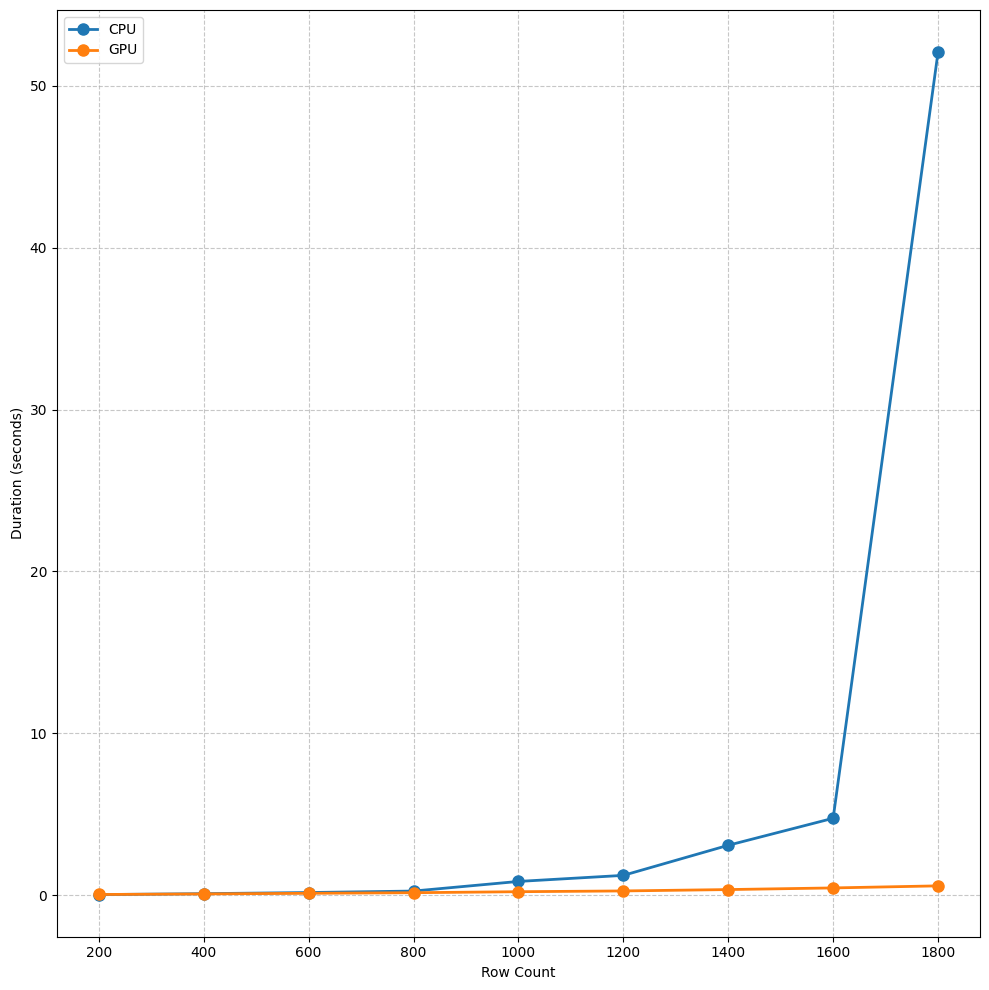

In [9]:
plot(all_data)